<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

Informe Tecnico


Integrantes:  Pamela Aldana
              


#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de 28
× 28 <br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

#FASE 1 :COMPRENDER EL NEGOCIO

Utilizaremos Tensor Flow  junto a Keras para programar varias Redes Neuronales  con el fin de predecir imágenes de ropa que estan clasificadas en 10 clases que son : 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot. Para esto vamos a disponer del Fashion MNIST dataset. Este dataset está separado en 60000 imágenes de entrenamiento y 10000 para el test,los cuales pueden ser obtenidos desde el tf.keras.


#FASE 2 :COMPRENDER LOS DATOS

## Importar librerías

In [17]:
!pip install tensorflow

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Flatten, MaxPool2D  # capz entradas , ocultas, salidas
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import models
from sklearn.manifold import TSNE

##Carga de datos Fashion MNIST

In [85]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

# Carga los datos en conjuntos de entrenamiento y prueba
(train_imagen, train_labels), (test_imagen, test_labels) = fashion_mnist.load_data()

# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Mostrar información sobre el conjunto de datos
print("Número de datos de entrenamiento:", len(train_imagen))
print("Número de datos de prueba:", len(test_imagen))
print("Forma  los de entrenamiento:", train_imagen[0].shape)
print("Categorias en la dataset:", np.unique(train_labels))
print("Clases:", clases)

Número de datos de entrenamiento: 60000
Número de datos de prueba: 10000
Forma  los de entrenamiento: (28, 28)
Categorias en la dataset: [0 1 2 3 4 5 6 7 8 9]
Clases: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [86]:
print(train_labels[:10])


[9 0 0 3 0 2 7 2 5 5]


In [87]:
print(test_labels[:10])


[9 2 1 1 6 1 4 6 5 7]


Las etiquetas de las clases van de 0 a 9 , lo que significa que hay 10 tipos diferentes de ropa

## Grafica de una  imagen con su etiqueta

label: T-shirt/top


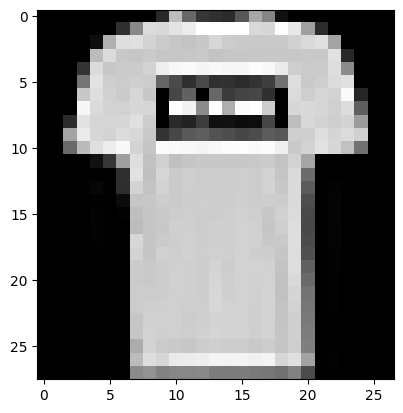

In [88]:
i=1
img = train_imagen[i,:,i:]
plt.imshow(img, cmap='gray')
plt.show
print(f"label: {clases[train_labels[i]]}")


Podemos visualizar una imagen del dataset

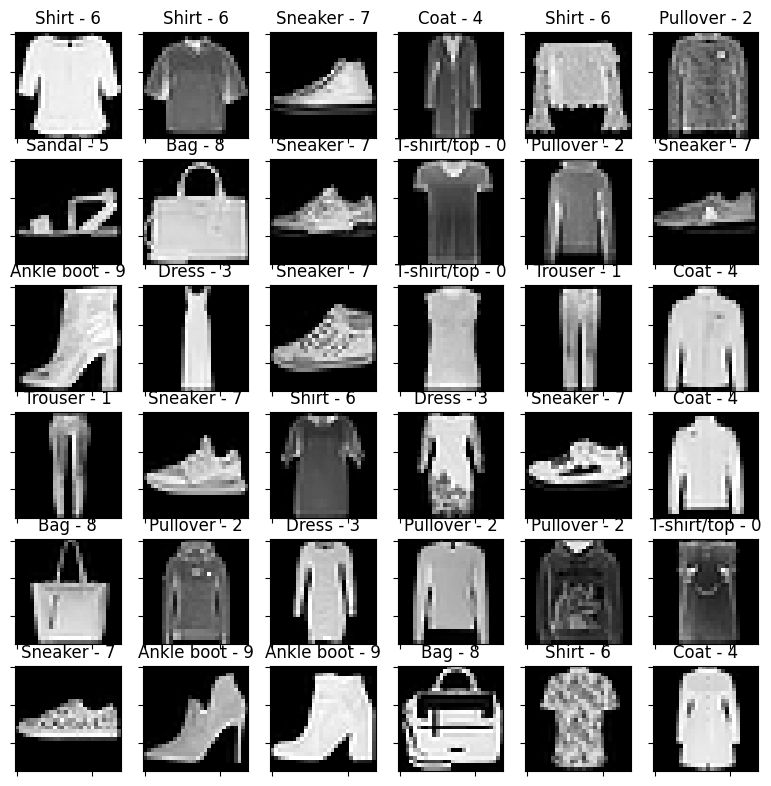

In [89]:
# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostramos una grilla de ejemplos (al azar)
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(train_imagen))
        axs[i,j].set_title(clases[train_labels[ex]] + " - " + str(train_labels[ex]))
        axs[i,j].grid(False)
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].imshow(train_imagen[ex], cmap='gray')
plt.show()


#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

In [90]:
# Normalizar los valores de píxeles de las imágenes
train_imagen, test_imagen = train_imagen / 255.0, test_imagen / 255.0

784 total pixeles  28 X 28

#FASE 4 MODELADO

# Modelo Perceptrón

Se crea un modelo que consiste en una sola unidad de procesamiento llamada perceptrón, que toma varias entradas , las pondera y las combina linealmente, y luego aplica una función de activación sigmoide para producir una salida. La función de pérdida se establece en 'binary_crossentropy' para problemas de clasificación binaria, y el modelo se entrena con los datos de entrenamiento. Luego, se evalúa el modelo con los datos de prueba para obtener la precisión en la clasificación.

##Primer modelo 1 Perceptron

**Definir el modelo**

In [11]:
# Definir el modelo del perceptrón
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),              # capa de aplanamiento.aplanar la imagen 28x28 a un vector de 784 elementos y sesgo 1
    Dense(1, activation='sigmoid')])                 # Capa de salida con una neurona y función de activación sigmoid


**Flatten:** Se utiliza para convertir las imágenes de 28x28 píxeles en un vector de 784 elementos antes de pasarlos a la capa densa (o de perceptrón) del modelo. <br>**Dense:** Esta es una capa totalmente conectada (dense) con un solo perceptrón.Produce una salida de un solo valor. La función de activación es la sigmoide. Tiene 785(28x28) parámetros, que son los pesos de conexión de cada píxel de entrada con el perceptrón más 1 sesgo adicional.
<br> **Total params:** Muestra el número total de parámetros en el modelo, hay 785 parámetros en total.
<br>**Trainable params:** Indica el número de parámetros que se pueden entrenar durante el proceso de entrenamiento, todos los parámetros son entrenables<br>

**Compilar el modelo**

In [12]:
# Compilar el modelo
model.compile(optimizer='sgd',                              # Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.
              loss='binary_crossentropy',                  # Utilizamos binary_crossentropy ya que es un problema de clasificación binaria
              metrics=['accuracy'])
                      # mide la exactud del modelo
# resumen Arquitectura
model.summary()
# optimizador sgd..Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [13]:
 #Entrenamiento del modelo

model.fit(train_imagen, train_labels, epochs=20, batch_size=32)




Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: -10683.7090 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: -32054.1133 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: -53424.5195 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: -74794.8906 - accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: -96165.2031 - accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: -117535.6875 - accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: -138906.1875 - accuracy: 0.1000
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: -160276.5156 - accuracy: 0.1000
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: -181646.9844 - accuracy: 0.1000
Epoch 10/20
1875/1875 [==========

**Evaluación del modelo**

In [14]:
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Perdida en los datos de prueba:', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: -427770.9062 - accuracy: 0.1000
Exactitud en los datos de prueba: 0.10000000149011612
Perdida en los datos de prueba: -427770.90625


Conclusion: <br>*
* El modelo clasificó correctamente alrededor del 10% de las muestras del conjunto de datos de prueba lo que es muy baja.
* La pérdida en los datos de prueba es  negativa, lo que indica un problema,  ya que representa la diferencia entre las predicciones del modelo y los valores reales.

##Segundo modelo de un perceptron

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define el modelo del perceptrón con una neurona en la capa de salida
model = Sequential([
    Flatten(input_shape=(28, 28)),              # Flatten the 28x28 image into a 784-element vector
    Dense(1, activation='sigmoid')             # Output layer with 10 neurons for the 10 classes and softmax activation
])

# Compila el modelo
model.compile(optimizer='adam',                  # Stochastic Gradient Descent optimizer
              loss='binary_crossentropy' ,   # Sparse categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])               # Accuracy metric to monitor during training

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrena el modelo
model.fit(train_imagen, train_labels, epochs=20, batch_size=32)

# Evalúa el modelo
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: -5.5733 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: -17.4488 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: -29.3025 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: -41.2295 - accuracy: 0.1000
Epoch

La precisión es de aproximadamente 0.1, lo que significa que el modelo clasifica correctamente alrededor del 10% de las muestras del conjunto de datos de prueba, lo que es muy bajo. <br> La pérdida mide que tan bien se está desempeñando el modelo en el conjunto de datos de prueba, y el valor negativo indica que algo está mal  con la forma en que se está calculando la pérdida.

CONCLUSION

El  modelo que utiliza la función de activación sigmoid en la capa de salida,  producirá una salida en el rango de 0 a 1, lo que nos indica la probabilidad de pertenencia a una clase específica. <>br
Al utilizar un  solo perceptrón en la capa de salida no es  óptimo para un problema de clasificación multiclase, ya que puede no puede capturar la complejidad de las relaciones entre las diferentes clases en el conjunto de datos Fashion MNIST.
<br> Tambien se entiende que la función de activación softmax seria la mas adecuada para clasificacion para un problema de clasificación multiclase, ya que softmax espera múltiples neuronas en la capa de salida para representar las diferentes clases. Teniendo en cuenta que este es un problema de clasificación multiclase, generalmente se utiliza una capa de salida con tantas neuronas como clases diferentes, y la función de activación softmax se aplica a todas las neuronas.<br>
Tambien se realizo un modelo con un optimizador Adam , no hubo mayor diferencia entre los 2 modelos ya que tiene perdida negativa y exactitud 10%, lo que indica que en este conjunto de datos fashion-Mnist, se deben realizar modelos mas complejos, relacionados con la clasificacion de multiclases







 El modelo muestra un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos y no puede aprender correctamente las relaciones entre las características de entrada y las etiquetas de salida

#Modelo Perceptrón multicapa MLP

#Cambiando las funcion de activacion.

Capas ocultas entre 1 y 3, manteniendo la cantidad de neuronas.

##Capas ocultas 1  manteniendo la cantidad de neuronas.

Probando con función de activación 'relu'
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 512)               401920    
                                                                 
 dense_44 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8790
Accuracy del modelo fully connected con función de activación 'relu': 0.8790000081062317


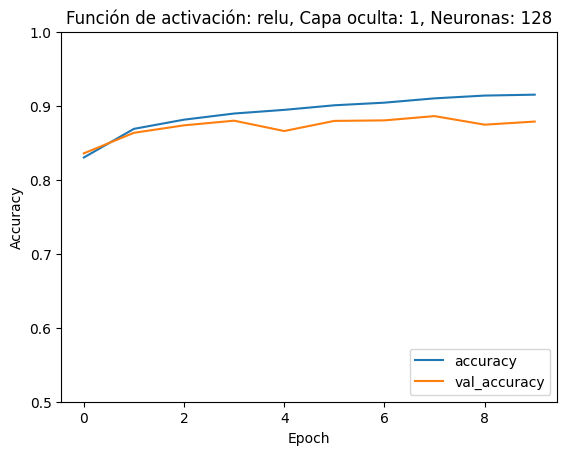

Probando con función de activación 'sigmoid'
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 dense_46 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.8877
Accuracy funcion de activación 'sigmoid': 0.8877000212669373


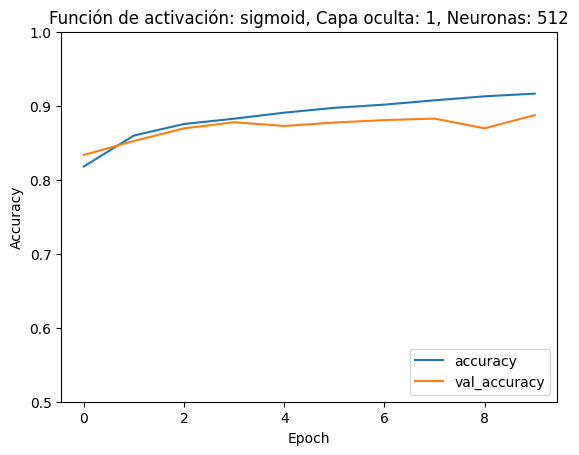

Probando con función de activación 'tanh'
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 512)               401920    
                                                                 
 dense_48 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8663
Accuracy de la función de activación 'tanh': 0.8662999868392944


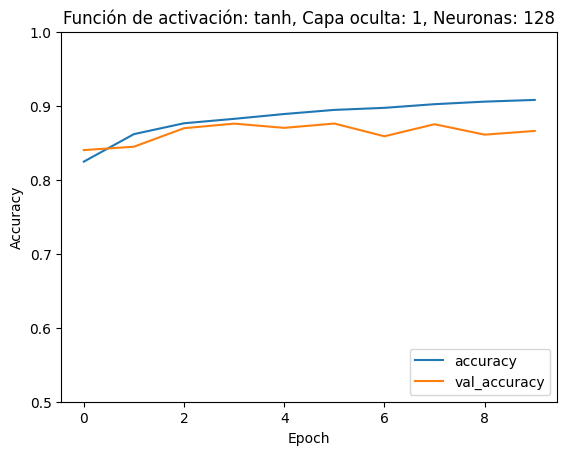

In [105]:

# Cargar Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

# Definir la cantidad de neuronas en la capa oculta
num_neurons = 512

# Función de activación: relu
print("Probando con función de activación 'relu'")
model_relu = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(num_neurons, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar y entrenar modelo con función de activación relu
model_relu.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


# Muestra un resumen de la arquitectura del modelo
model_relu.summary()

history_relu = model_relu.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Evaluación del modelo con función de activación relu
test_loss_relu, test_acc_relu = model_relu.evaluate(X_test, y_test)
print("Accuracy del modelo fully connected con función de activación 'relu':", test_acc_relu)

# Graficar curvas de aprendizaje con función de activación relu
plt.plot(history_relu.history['accuracy'], label='accuracy')
plt.plot(history_relu.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Función de activación: relu, Capa oculta: 1, Neuronas: 128")
plt.show()

# Función de activación: sigmoid
print("Probando con función de activación 'sigmoid'")
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(num_neurons, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar y entrenar modelo con función de activación sigmoid
model_sigmoid.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


# Muestra un resumen de la arquitectura del modelo
model_sigmoid.summary()

history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Evaluación del modelo con función de activación sigmoid
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(X_test, y_test)
print("Accuracy funcion de activación 'sigmoid':", test_acc_sigmoid)

# Graficar curvas de aprendizaje con función de activación sigmoid
plt.plot(history_sigmoid.history['accuracy'], label='accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Función de activación: sigmoid, Capa oculta: 1, Neuronas: 512")
plt.show()

# Función de activación: tanh
print("Probando con función de activación 'tanh'")
model_tanh = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(num_neurons, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar y entrenar modelo con función de activación tanh
model_tanh.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Muestra un resumen de la arquitectura del modelo
model_tanh.summary()

history_tanh = model_tanh.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Evaluación del modelo con función de activación tanh
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(X_test, y_test)
print("Accuracy de la función de activación 'tanh':", test_acc_tanh)

# Graficar curvas de aprendizaje con función de activación tanh
plt.plot(history_tanh.history['accuracy'], label='accuracy')
plt.plot(history_tanh.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Función de activación: tanh, Capa oculta: 1, Neuronas: 512")
plt.show()


##Primer modelo MLP
1 capa oculta <br>
512 perceptron<br>
**relu funcion activacio**n<br>
Adam optimizador<br>
Softmax funcion de salida

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               401920    
                                                                 
 dense_50 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
416/416 [==============================] - 5s 11ms/step - loss: 0.5248 - accuracy: 0.8166 - val_loss: 0.4298 - val_accuracy: 0.8395
Epoch 2/20
416/416 [==============================] - 5s 12ms/step - loss: 0.3787 - accuracy: 0.8646 - val_loss: 0.3789 - val_accuracy: 0.

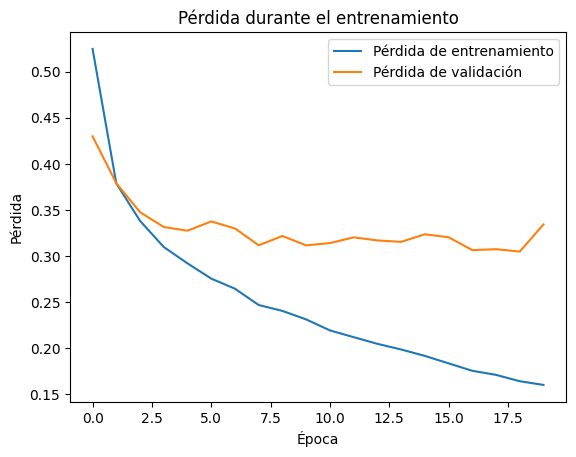

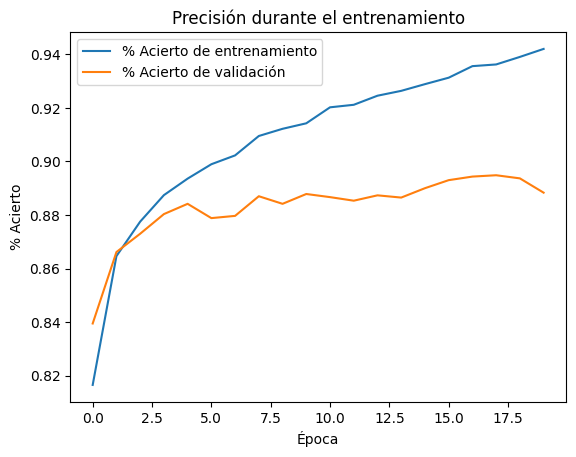

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

# Cargar el conjunto de datos Fashion MNIST
(train_imagen, train_labels), (test_imagen, test_labels) = fashion_mnist.load_data()

# Preprocesamiento de datos
train_imagen = train_imagen / 255.0
test_imagen = test_imagen / 255.0

# Definir el modelo de perceptrón multicapa
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa de entrada: aplanar la imagen
    Dense(512, activation='relu'),  # Capa oculta: 512 neuronas con activación ReLU/ tanh
    Dense(10, activation='softmax')  # Capa de salida: 10 neuronas con activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])  # Métrica de evaluación durante el entrenamiento

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrenar el modelo con un conjunto de validación
h = model.fit(train_imagen, train_labels, epochs=20, batch_size=130, verbose=1, validation_split=0.1)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print("Precisión en el conjunto de prueba:", test_acc)
print("Pérdida en el conjunto de prueba:", test_loss)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(h.history['loss'], label='Pérdida de entrenamiento')
plt.plot(h.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(h.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()





 * Grafico de Pérdida durante el entrenamiento y la validación: <br>
La línea de pérdida de validación comienza a aumentar mientras la de entrenamiento continúa disminuyendo, esto indica sobreajuste.( esto es indicio de overfitting (memorización de test))<br>
* Precisión durante el entrenamiento y la validación:
Ambas líneas deberían mostrar una tendencia creciente a lo largo de las épocas. La precisión de validación comienza a disminuir y mientras la de entrenamiento continúa aumentando,indica sobreajuste(memorización de test) .

1/1 [==============================] - 0s 20ms/step


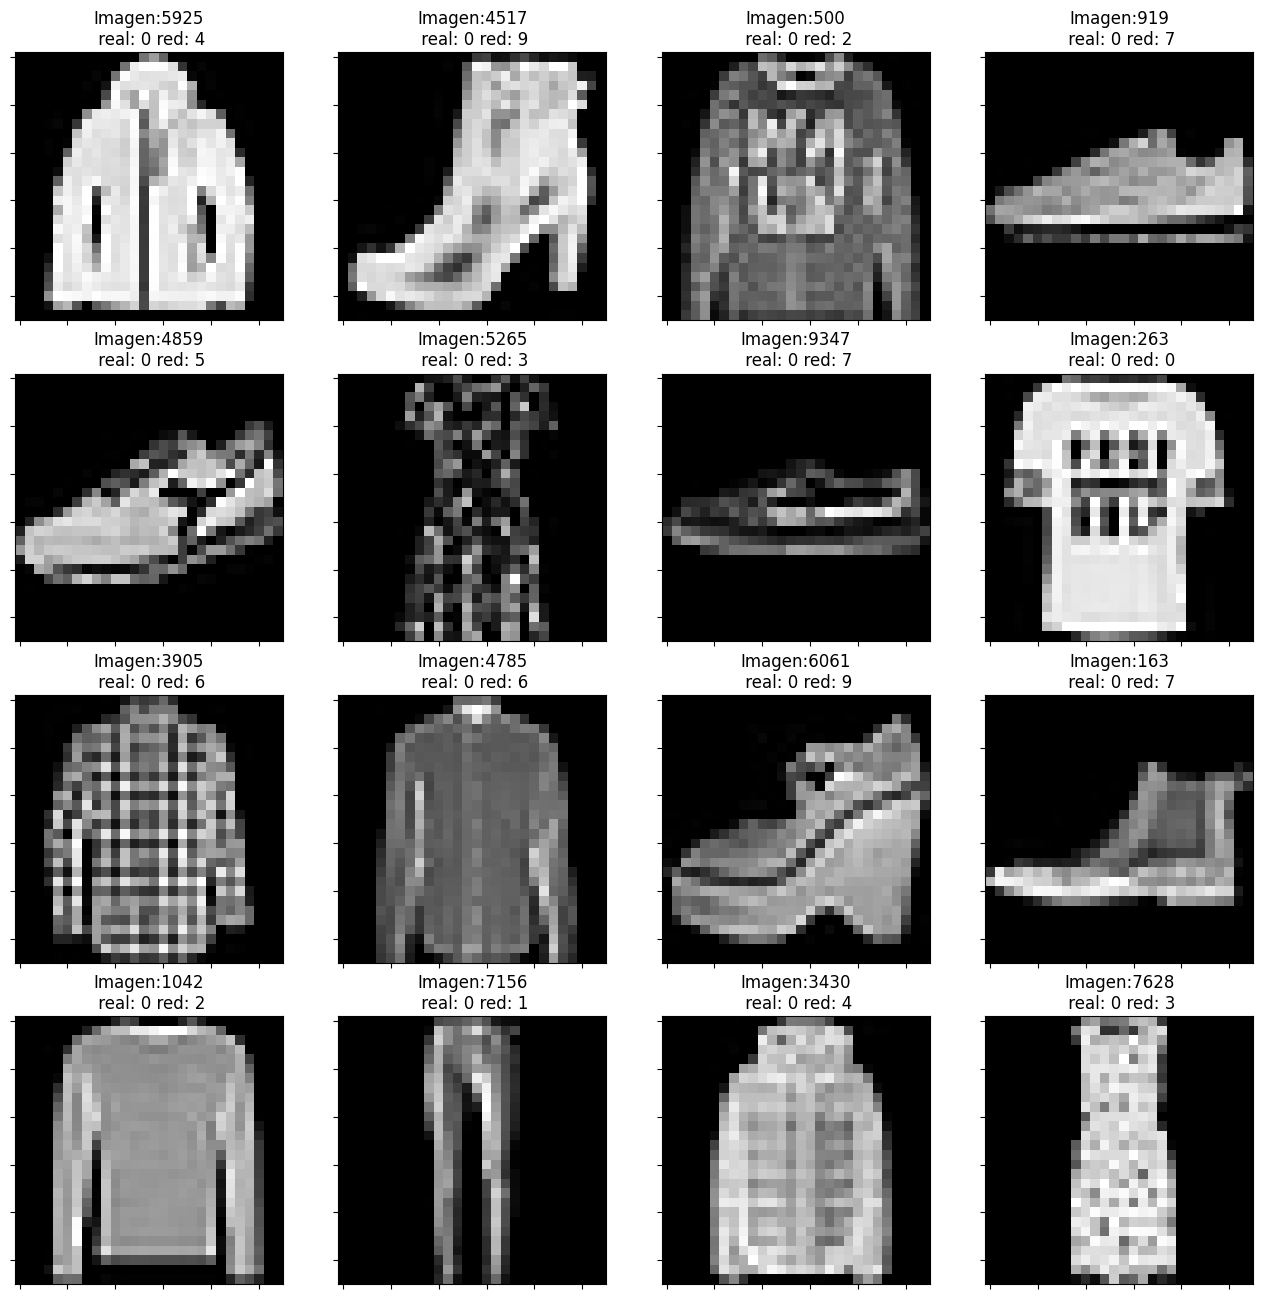

In [113]:
# Veamos algunas predicciones
h = 4
w = 4
fig, axs = plt.subplots(h, w, figsize=(4*h,4*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(test_imagen))
        Xin = test_imagen[ex].reshape(1,28,28)
        Ypred = model.predict(Xin).reshape(10)
        lpred = np.argmax(Ypred)

        axs[i,j].set_title("Imagen:" + str(ex) + "\n real: " + str(np.argmax(test_labels[ex])) + " red: " + str(lpred))
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].grid(False)
        axs[i,j].imshow(test_imagen[ex], cmap='gray')

##Segundo modelo MLP

In [114]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

# Cargamos los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets. fashion_mnist.load_data()
print(imgs.shape,"imgs")
print(labs.shape,"labs")

# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape,"x.shape")

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape, "y.shape")

# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

(60000, 28, 28) imgs
(60000,) labs
(60000, 784) x.shape
(60000, 10) y.shape
60000 784 10


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.7011

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_41" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


## Capas escondidas 2

In [109]:
# tamaños de capas escondidas

h1 = 512
h2=1024
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 1024)              525312    
                                                                 
 capa_de_output (Dense)      (None, 10)                10250     
                                                                 
Total params: 937482 (3.58 MB)
Trainable params: 937482 (3.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
 #Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])



In [111]:

# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.

h = red.fit( X , Y,
        epochs=20,
        batch_size=130,
       )


Epoch 1/20
462/462 [==============================] - 10s 22ms/step - loss: 1.0357 - accuracy: 0.6932
Epoch 2/20
462/462 [==============================] - 10s 23ms/step - loss: 0.6215 - accuracy: 0.8010
Epoch 3/20
462/462 [==============================] - 10s 23ms/step - loss: 0.5407 - accuracy: 0.8197
Epoch 4/20
462/462 [==============================] - 13s 28ms/step - loss: 0.5009 - accuracy: 0.8292
Epoch 5/20
462/462 [==============================] - 11s 24ms/step - loss: 0.4761 - accuracy: 0.8366
Epoch 6/20
462/462 [==============================] - 10s 22ms/step - loss: 0.4595 - accuracy: 0.8422
Epoch 7/20
462/462 [==============================] - 10s 22ms/step - loss: 0.4472 - accuracy: 0.8445
Epoch 8/20
462/462 [==============================] - 10s 21ms/step - loss: 0.4354 - accuracy: 0.8491
Epoch 9/20
462/462 [==============================] - 9s 20ms/step - loss: 0.4255 - accuracy: 0.8530
Epoch 10/20
462/462 [==============================] - 10s 22ms/step - loss: 0.4173

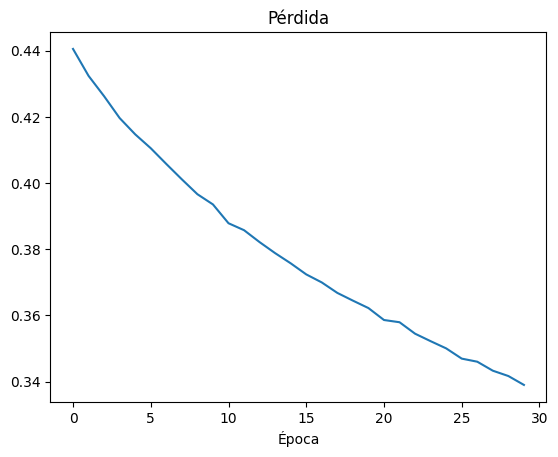

In [49]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

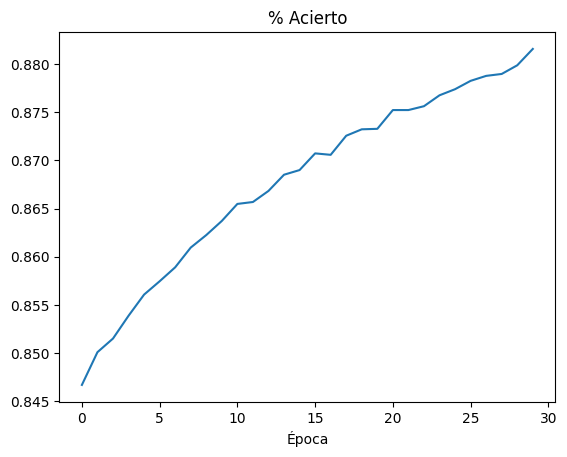

In [50]:
# porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()


# Predicciones

1/1 [==============================] - 0s 33ms/step


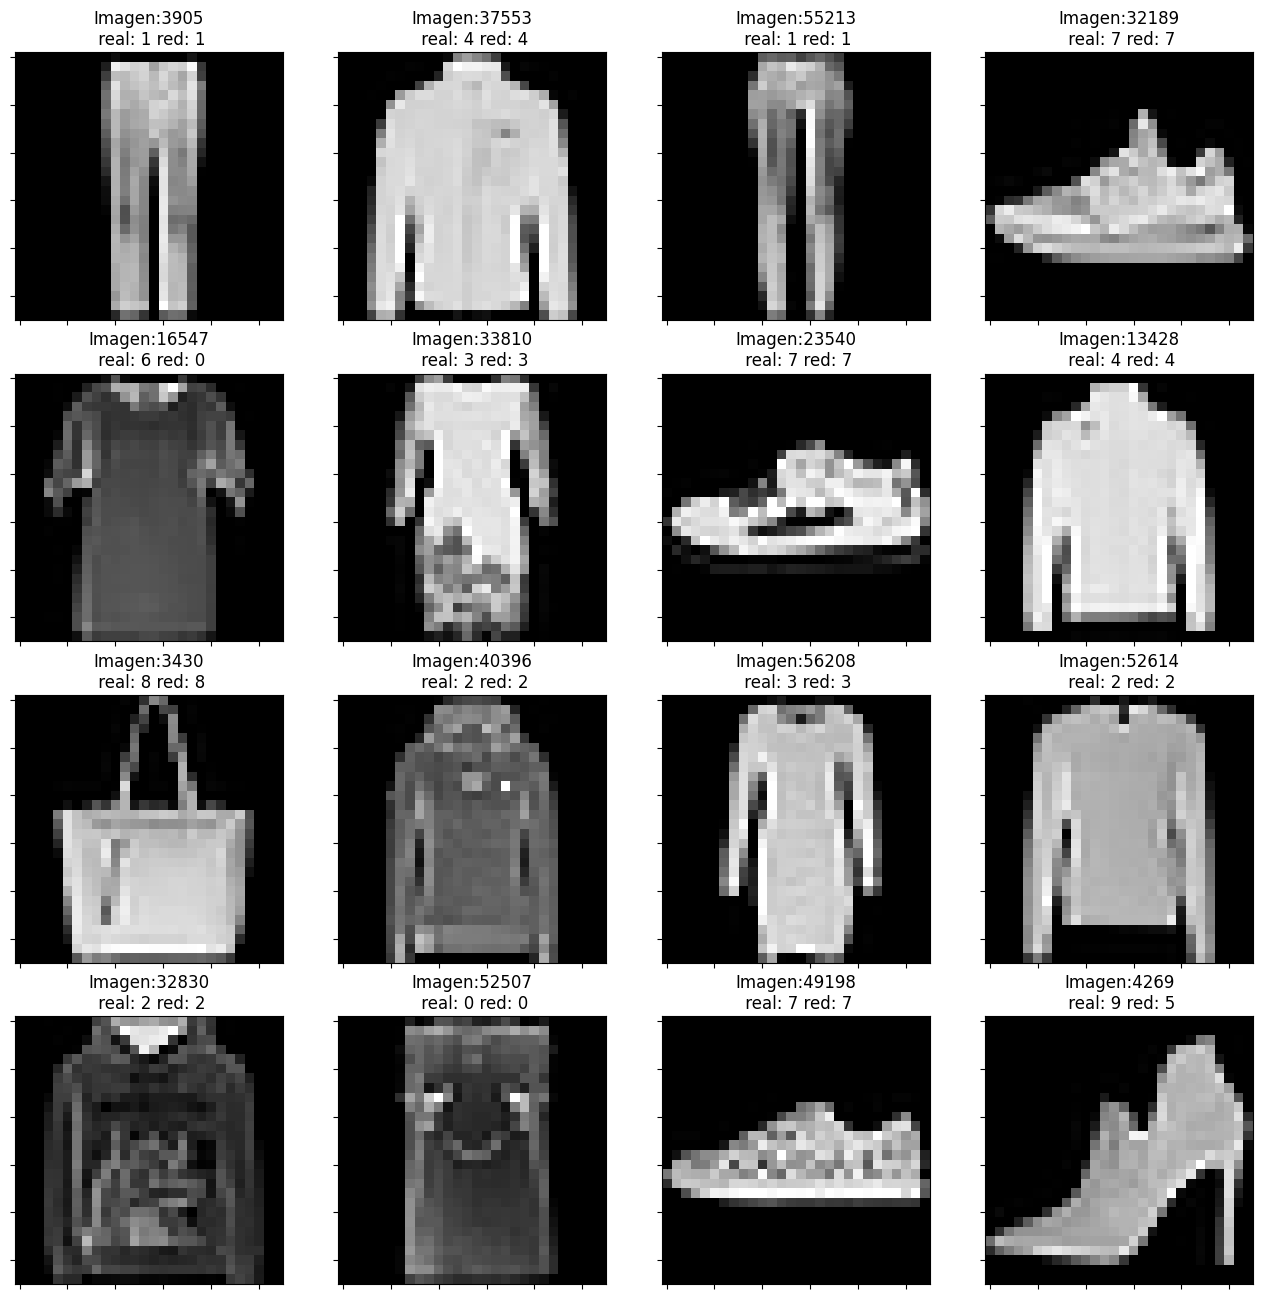

In [54]:
# Veamos algunas predicciones
h = 4
w = 4

fig, axs = plt.subplots(h, w, figsize=(4*h,4*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X [ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("Imagen:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex],cmap='gray')

(60000, 28, 28)
(10000, 28, 28)
X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)
784 10 60000 10000
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.9427 - accuracy: 0.7735 - val_loss: 0.5424 - val_accuracy: 0.8699
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4950 - accuracy: 0.8735

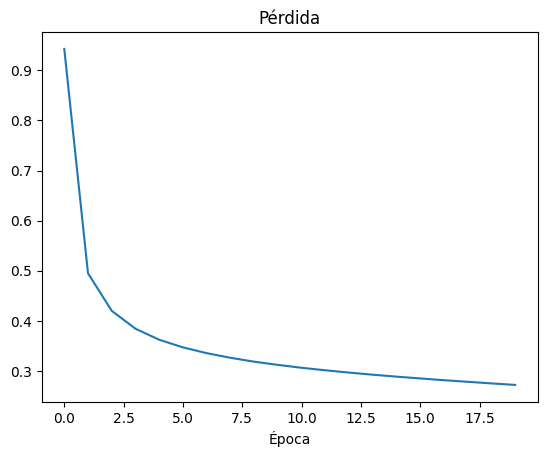

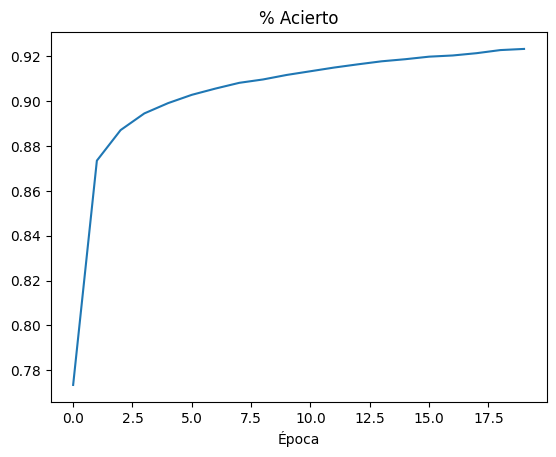

In [117]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

#definimos las capas y las neuronas por capa oculta

h1 = 512

# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa_oculta'))
#red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa_oculta'))
#red.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

# MODELOS 1 CAPA OCULTA

## Primer modelo con una capa y funcion activacion (relu)



In [92]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [95]:
#Cargamos los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets.fashion-mnist.load_data()
print(imgs.shape)
print(labs.shape)

AttributeError: module 'tensorflow.keras.datasets' has no attribute 'fashion'

In [94]:
# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


In [80]:
#definimos la capa y las neuronas por capa oculta
h1 = 512

In [81]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
#red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [83]:
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

NameError: name 'X_train' is not defined

La pérdida en el entrenamiento es 0.3982 y tiene una precisión de entrenamiento del 86,33%.
La pérdida en la validación es 0.4342 y una precisión de validación del 84,72%

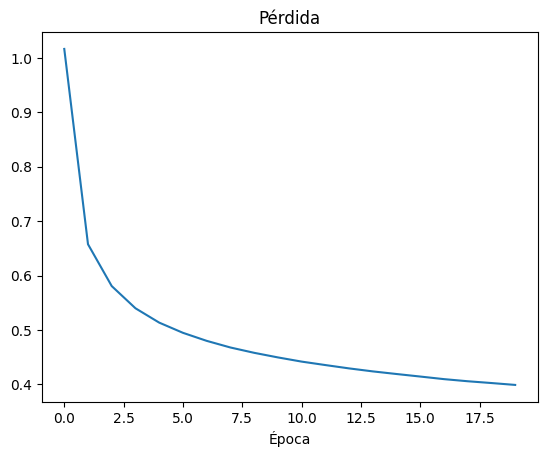

In [ ]:
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

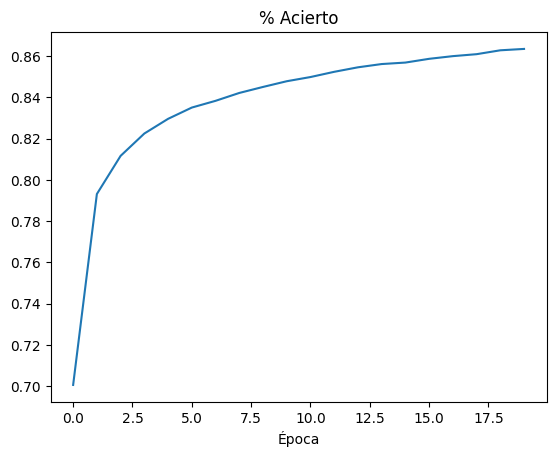

In [ ]:
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

## Segundo modelo con una capa y funcion de activacion (tanh)

In [ ]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

#definimos la capa y las neuronas por capa oculta
h1 = 512

In [ ]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

In [ ]:
# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9448 - accuracy: 0.7064 - val_loss: 0.7072 - val_accuracy: 0.7611
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.6286 - accuracy: 0.7968 - val_loss: 0.6087 - val_accuracy: 0.7946
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5599 - accuracy: 0.8156 - val_loss: 0.5626 - val_accuracy: 0.8082
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5238 - accuracy: 0.8252 - val_loss: 0.5353 - val_accuracy: 0.8153
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5006 - accuracy: 0.8304 - val_loss: 0.5186 - val_accuracy: 0.8231
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4843 - accuracy: 0.8339 - val_loss: 0.5039 - val_accuracy: 0.8260
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4717 - accuracy: 0.8385 - val_loss: 0.4966 - val_accuracy: 0.8243

La pérdida en el entrenamiento es 0.4065 y tiene una precisión de entrenamiento del 85,84%.
La pérdida en la validación es 0.4419 y una precisión de validación del 84.21%

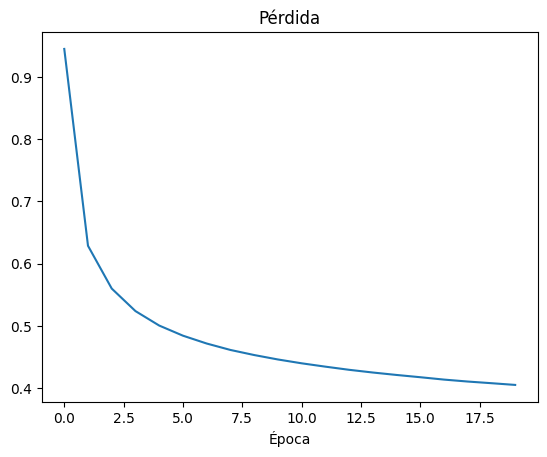

In [ ]:
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

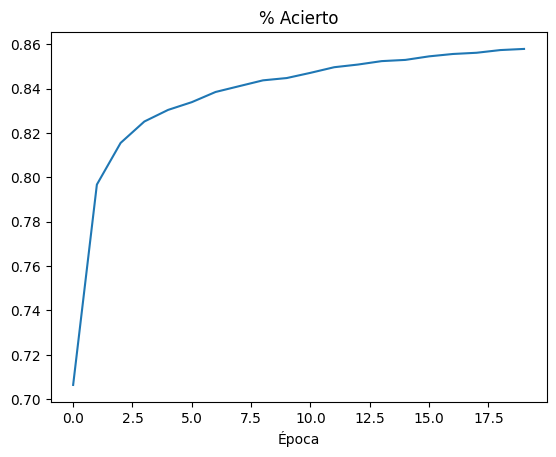

In [ ]:
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

## Tercer modelo con una capa y funcion activacion (sigmoide)

In [ ]:
#definimos las capas y las neuronas por capa oculta
h1 = 512

In [ ]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

In [ ]:
# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.7047 - accuracy: 0.5895 - val_loss: 1.3089 - val_accuracy: 0.6871
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.1259 - accuracy: 0.7118 - val_loss: 1.0051 - val_accuracy: 0.7163
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.9222 - accuracy: 0.7322 - val_loss: 0.8723 - val_accuracy: 0.7339
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8211 - accuracy: 0.7440 - val_loss: 0.7984 - val_accuracy: 0.7403
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.7601 - accuracy: 0.7535 - val_loss: 0.7496 - val_accuracy: 0.7501
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.7186 - accuracy: 0.7600 - val_loss: 0.7149 - val_accuracy: 0.7559
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6877 - accuracy: 0.7667 - val_loss: 0.6892 - val_accuracy: 0.7609

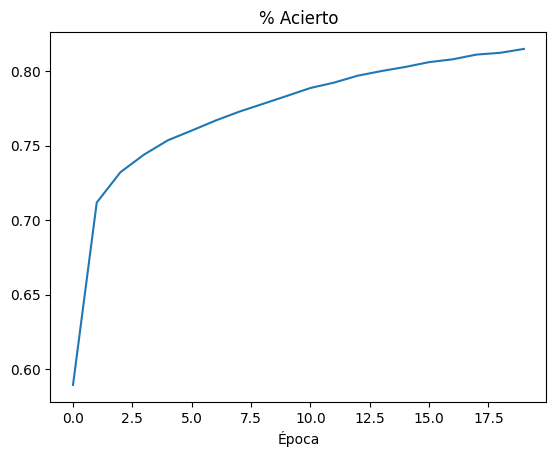

In [ ]:
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

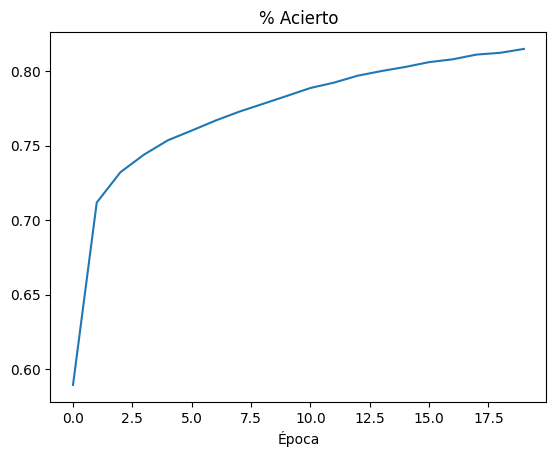

In [ ]:
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

#  MODELOS DE 2 CAPAS OCULTAS

##Primer modelo 2 capas ocultas : funcion activacion( sigmoid , sigmoid)

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron 1024, 512
h2 = 256
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # funcion de activacion relu, sigmoid,tanh
red.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd', # Adam
    metrics=['accuracy']
)

hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 2.2296 - accuracy: 0.3222 - val_loss: 2.1317 - val_accuracy: 0.5273
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0075 - accuracy: 0.5345 - val_loss: 1.8632 - val_accuracy: 0.

 loss: 0.532 - accuracy: 0.8120 val_loss: 0.5524 - val_accuracy: 0.8024

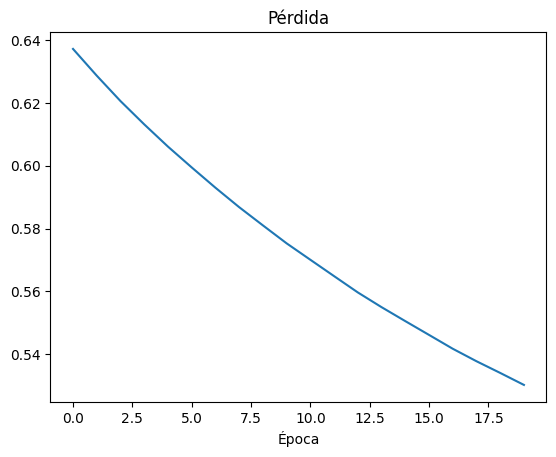

In [ ]:
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

te dice en que epoca hay q cortar

donde donde  la epoca se vuelve constante ,, esa epoca es la que se usa y se cambia

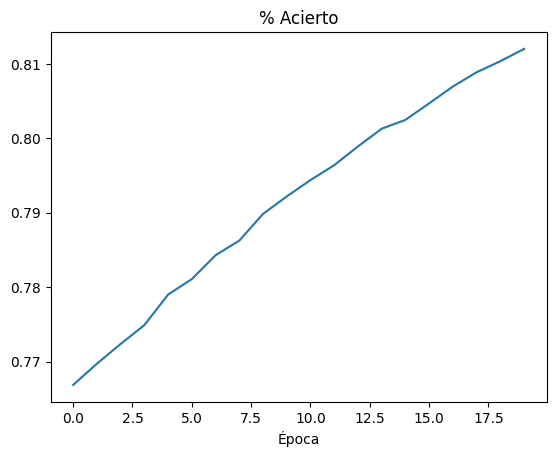

In [ ]:
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

acuuracy:cantidad de aciertos

# MODELO 3 capas ocultas


## Primer  modelo 3 capas : funcion de activacion (relu, relu, relu)

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases    # softmax es funcion de activacion  capa de salida
#softmax funcion de salida ,para claficacion, distribucion de probabilidades
red.summary()  # arquitectura
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',     # optimizador  ajusatr pesos y bias
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

##Segundo modelo de 3 capas ocultas: funcion de activacion(tanh,tanh,tanh)

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

##Tercer modelo de 3 capas ocultas : funcion de activacion (sigmoid, sigmoid,sigmoid)

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd', # descenso del gradiente   minimo local ,
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()
# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

In [ ]:
#definimos las capas y las neuronas por capa oculta

h1 = 512

# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa_oculta'))
#red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa_oculta'))
#red.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

# imprime la pérdida para cada época

plt.plot(hist.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

# imprime el porcentaje de acierto para cada época

plt.plot(hist.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()